### 项目来源：

**由Datawhale与天池联合发起的0基础入门系列赛事第一场 —— 零基础入门数据挖掘之二手车交易价格预测大赛。可以在[这里](https://tianchi.aliyun.com/competition/entrance/231784/introduction)看到**

### 项目目标：

* **赛题以二手车市场为背景，要求选手预测二手汽车的交易价格，这是一个典型的回归问题。通过这道赛题来引导大家走进AI数据竞赛的世界，主要针对于于竞赛新人进行自我练习、自我提高。**，
* **为了更好的引导大家入门，Datawhale同时为本赛题定制了系列学习方案，其中包括数据科学库、通用流程和baseline方案学习三部分。通过对本方案的完整学习，可以帮助掌握数据竞赛基本技能。同时我们也将提供专属的视频直播学习通道。**

### 项目介绍：

这是一个**受监督的回归机器学习任务**：给定一组包含目标（在本例中为分数）的数据，我们希望训练一个可以学习将特征（也称为解释变量）映射到目标的模型。

* **受监督问题**： 我们可以知道数据的特征和目标，我们的目标是训练可以学习两者之间映射关系的模型。
* **回归问题**： 二手车交易价格是一个连续变量。

在训练中，我们希望模型能够学习特征和分数之间的关系，因此我们给出了特征和答案。然后，为了测试模型的学习效果，我们在一个从未见过答案的测试集上进行评估

### 数据属性说明

**Filed** | **Description**
:-: | :-: 
SaleID | 交易ID，唯一编码
name | 汽车交易名称，已脱敏
regDate | 汽车注册日期，例如20160101，2016年01月01日
model | 车型编码，已脱敏
brand | 汽车品牌，已脱敏
bodyType | 车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7
fuelType | 燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6
gearbox | 变速箱：手动：0，自动：1
power | 发动机功率：范围[0, 600]
kilometer | 汽车已行驶公里，单位万km
notRepairedDamage | 汽车有尚未修复的损坏：是：0，否：1
regionCode | 地区编码，已脱敏
seller | 销售方：个体：0，非个体：1
offerType | 报价类型：提供：0，请求：1
createDate| 汽车上线时间，即开始售卖时间
price | 二手车交易价格（预测目标）
v系列特征 | 匿名特征，包含v0-14在内15个匿名特征

# Machine Learning Workflow

我们在**拿到一个机器学习问题之后，要做的第一件事就是制作出我们的机器学习项目清单**。下面给出了一个可供参考的机器学习项目清单，它应该适用于大多数机器学习项目，虽然确切的实现细节可能有所不同，但机器学习项目的一般结构保持相对稳定：

1. 数据清理和格式化

2. 探索性数据分析

3. 特征工程和特征选择

4. 基于性能指标比较几种机器学习模型

5. 对最佳模型执行超参数调整

6. 在测试集上评估最佳模型

7. 解释模型结果

8. 得出结论


提前设置机器学习管道结构让我们看到每一步是如何流入另一步的。但是，机器学习管道是一个迭代过程，因此我们并不总是以线性方式遵循这些步骤。我们可能会根据管道下游的结果重新审视上一步。例如，
* 虽然我们可以在构建任何模型之前执行特征选择，但我们可以使用建模结果返回并选择一组不同的特征。 
* 或者，建模可能会出现意想不到的结果，这意味着我们希望从另一个角度探索我们的数据。 
* 一般来说，你必须完成一步才能继续下一步，但不要觉得一旦你第一次完成一步，你就不能回头做出改进！你可以在任何时候返回前面的步骤并作出相应的修改

# Imports

使用标准的数据科学和机器学习库：`numpy，pandas`和`scikit-learn`。 使用`matplotlib`和`seaborn`进行可视化。

In [1]:
# 用于数据操作的pandas和numpy
import pandas as pd
import numpy as np

# 不显示关于在切片副本上设置值的警告
pd.options.mode.chained_assignment = None

# 一个dataframe 最多显示60例样本
pd.set_option('display.max_columns', 60)

# 可视化工具包
import matplotlib.pyplot as plt
%matplotlib inline

# 设置默认字体大小
plt.rcParams['font.size'] = 24

# 导入设置图片大小的工具
from IPython.core.pylabtools import figsize

# 导入用于可视化的Seaborn
import seaborn as sns
sns.set(font_scale = 2)

# 把数据分为训练集和测试集

from sklearn.model_selection import train_test_split

import math

# 数据清理和格式化

## 加载并检查数据

我们把数据加载到pandas数据帧中，这是数据科学最有用的数据结构之一。将其视为Python中的电子表格，我们可以轻松地操作，清理和可视化。[Pandas有许多方法](https://pandas.pydata.org/pandas-docs/stable/)可以帮助使数据科学/机器学习管道尽可能顺利。

In [2]:
# 把数据读入pandas dataframe
data = pd.read_csv('used_car_train_20200313.csv', sep=' ')

# 显示表头
data.head()


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


## 数据类型和缺失值

`dataframe.info`方法是一种通过显示每列的**数据类型**和**非缺失值的数量**来评估数据的快速方法。从查看数据帧开始，可能存在问题，因为缺失值被编码为`Not Available`而不是`np.nan`（不是数字）。这意味着带有数字的列将不会表示为数字，因为**pandas会将具有任何字符串值的列转换为所有字符串的列**。

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

对于`notRepairedDamage`列，本该是明确包含数字，但被存储为object类型（对象类型）。我们不能对字符串进行数值分析，因此必须将其转换为数字（特别是浮点数）数据类型。

这里把`notRepairedDamage`列中的不同值进行显示

In [4]:
data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出来`'-'`也应该表示空缺值，**但是从`data.info()`给出的信息上却没有被视为空缺值**，所以先将其替换为nan

In [5]:
data.replace('-', np.nan, inplace=True)

### 将数据转换为正确的类型

* 我们首先**将带有数组并且缺失值被编码为`Not Available`的列转换为数字数据特征**，方法是将`Not Available`项替换为可以解释为浮点数的np.nan。
* 然后我们将包含数值的列转换为合理的数字数据类型（将object类转换为数字数据类型）

In [6]:
# 将"Not Available" 项替换为可以解释为浮点数的np.nan
data = data.replace({'Not Available': np.nan})


# 转换某些列的数据类型
for col in list(data.columns):
    # 选择需要被数字化的列，通过if判断实现
    # 凡是包含下列红色字体的列，都是需要被转换的列
    if ('notRepairedDamage' in col):
        # 将数据类型转换为float
        data[col] = data[col].astype(float)

In [7]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,NaN,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


### 处理缺失值

In [8]:
# 查看每一列存在nan的情况
data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

我们可以通过查看每列中缺失值的百分比来开始分析。当我们进行探索性数据分析时，缺失值的处理尤其关键，需要通过合理的方法来判断是否进行填充或删除。

以下是一个函数，用于计算缺失值的数量以及每列缺少的总之的百分比。与数据科学中的许多任务一样，我自己没有编写这个函数，而是在在线论坛[Stack Overflow forum](https://stackoverflow.com/a/39734251) 中发现它的！

In [9]:
# 定义按列计算缺失值的函数
def missing_values_table(df):
    # 计算总的缺失值
    mis_val = df.isnull().sum()
    
    # 计算缺失值的百分比
    mis_val_percent = 100 * mis_val / len(df)
    
    # 把结果制成表格
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # 对列重命名，第一列：Missing Values，第二列：% of Total Values
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: 'Missing Values', 1: '% of Total Values'})
    
    # 根据百分比对表格进行降序排列
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # 打印总结信息：总的列数，有数据缺失的列数
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) + 
         " columns that have missing values.")
    
    # 返回带有缺失值信息的dataframe
    return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 31 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
notRepairedDamage,24324,16.2
fuelType,8680,5.8
gearbox,5981,4.0
bodyType,4506,3.0
model,1,0.0


In [11]:
data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,125676.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,0.113904,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,0.317696,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,0.000000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,0.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,0.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,1.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


# 探索性数据分析（EDA）

[探索性数据分析（EDA）](https://en.wikipedia.org/wiki/Exploratory_data_analysis)是一个开放式流程，我们制作绘图并计算统计数据，以便探索我们的数据。 

* 目的是找到异常，模式，趋势或关系。 这些可能是有趣的（例如，找到两个变量之间的相关性），或者它们可用于建模决策，例如使用哪些特征。 
* 简而言之，EDA的目标是确定我们的数据可以告诉我们什么！ EDA通常以高级概述(high-level overview)开始，然后在我们找到要检查的感兴趣的区域时缩小到数据集的特定部分。

要开始EDA，我们将专注于单一变量（单个特征或预测目标）。

## 单变量图

单个变量,称为[单变量](https://en.wikipedia.org/wiki/Univariate)（统计）图表显示单个变量的分布，例如直方图。

In [12]:
feature_cols = data.columns.drop('price')

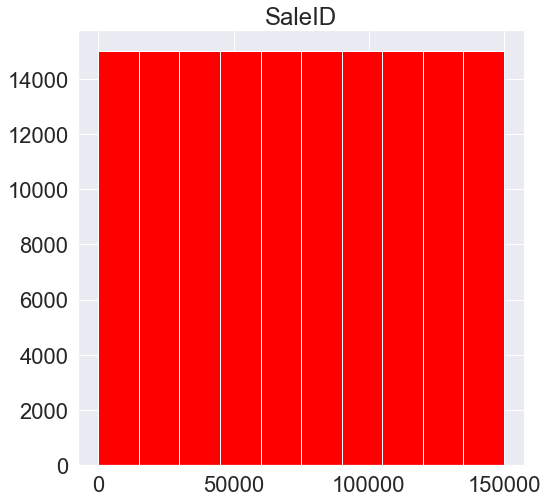

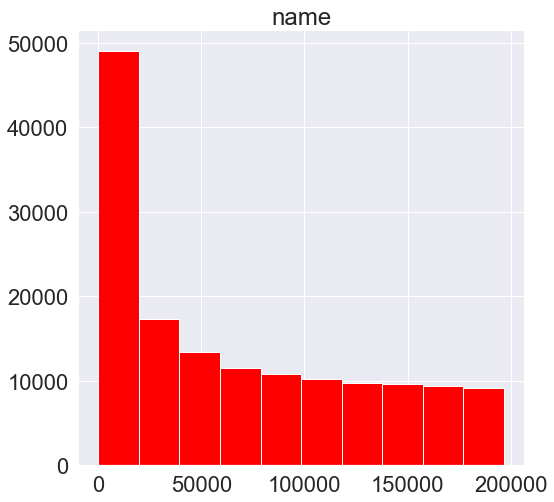

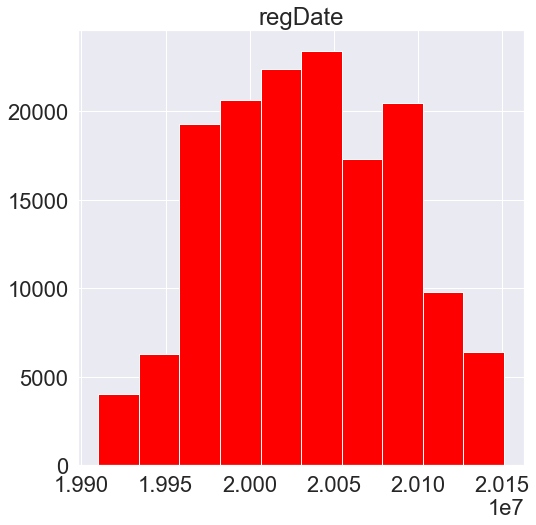

c:\users\xyao\envs\learnpy\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\xyao\envs\learnpy\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


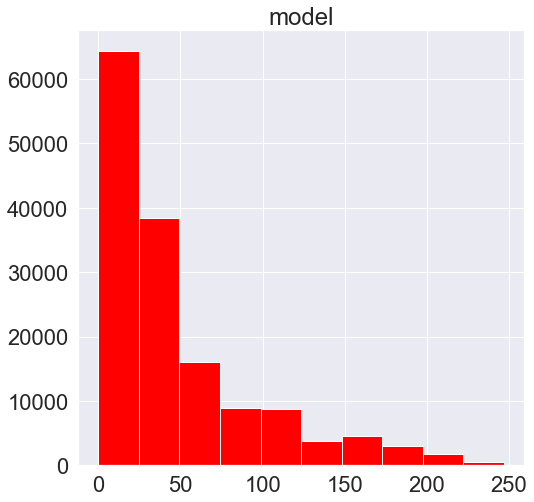

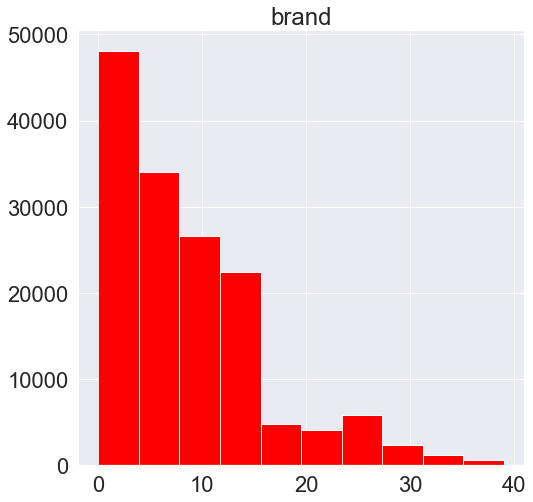

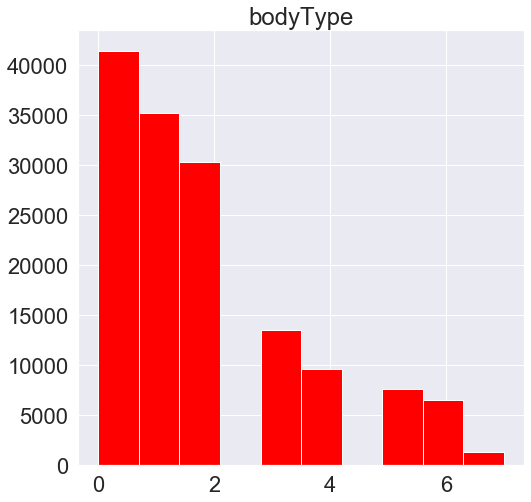

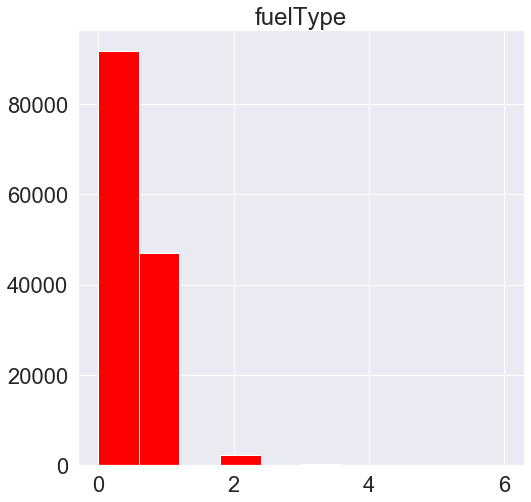

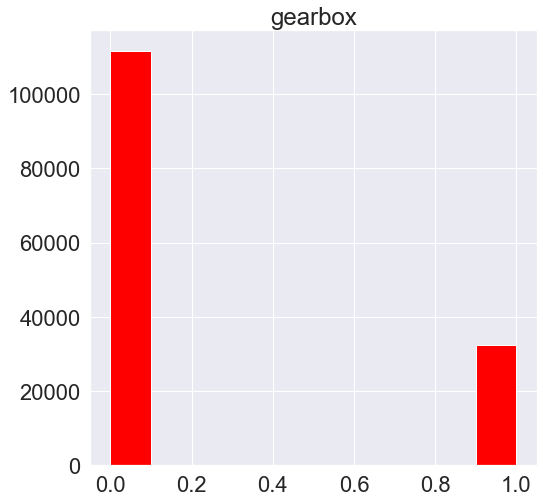

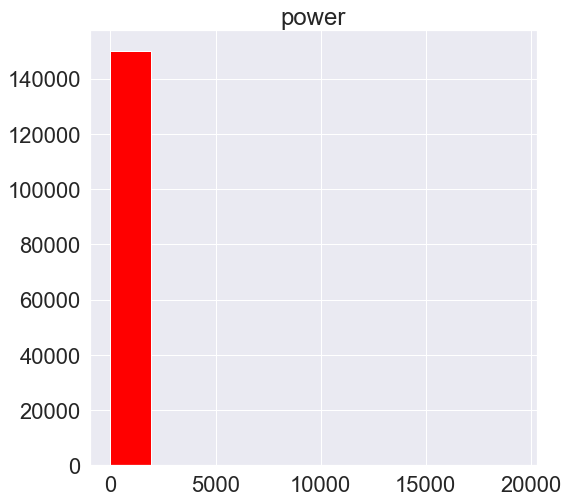

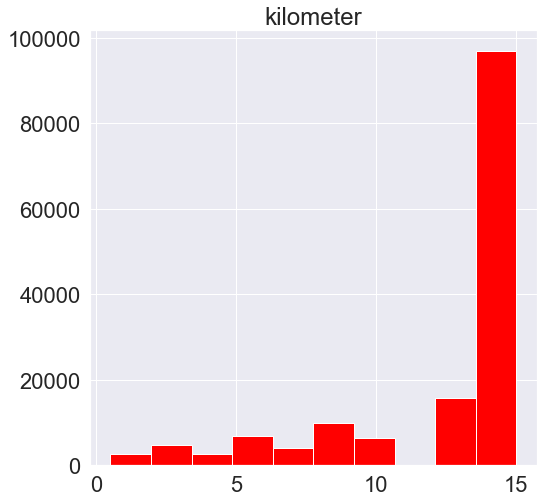

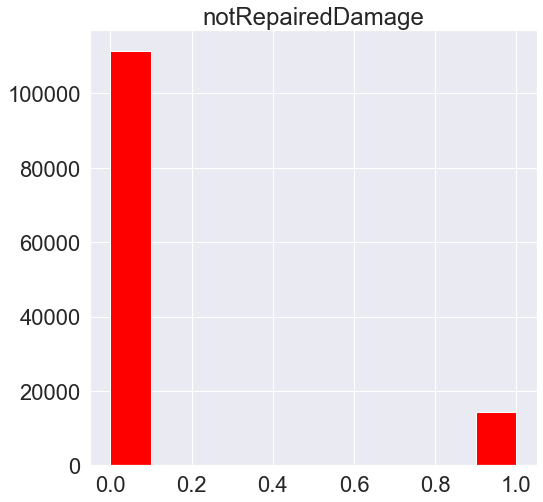

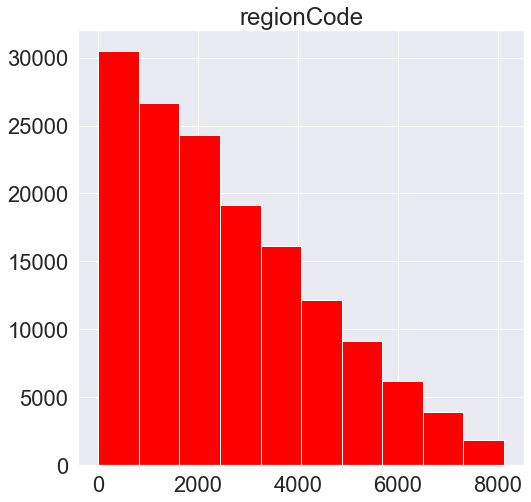

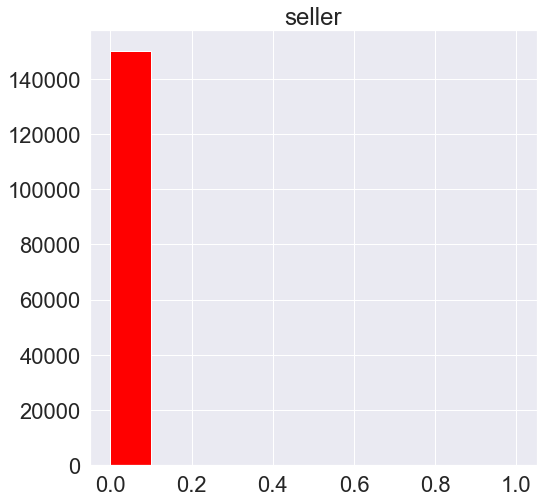

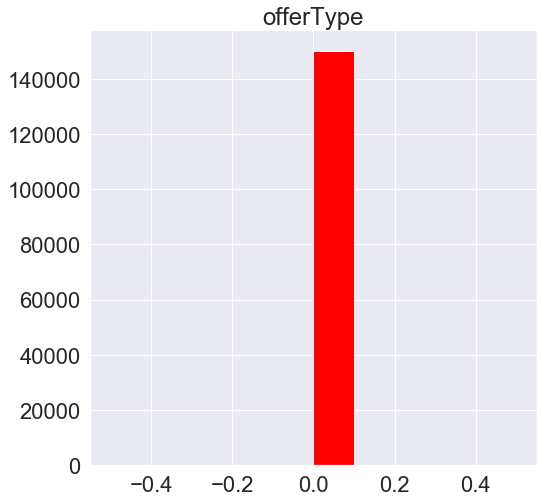

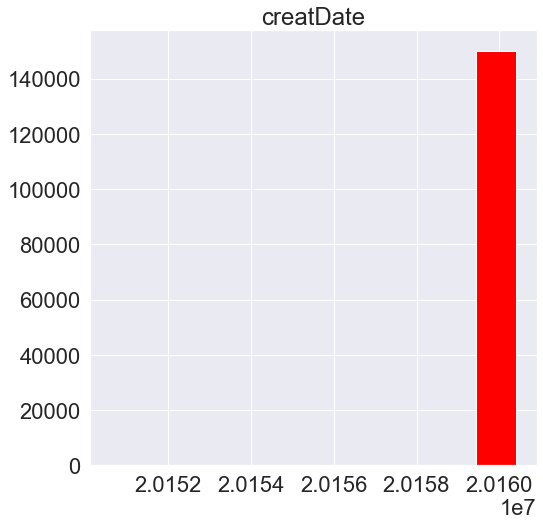

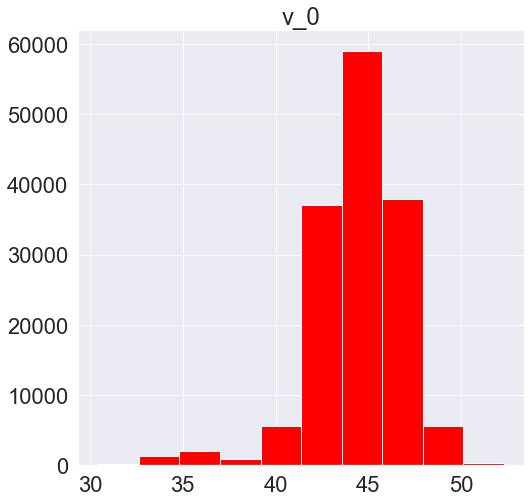

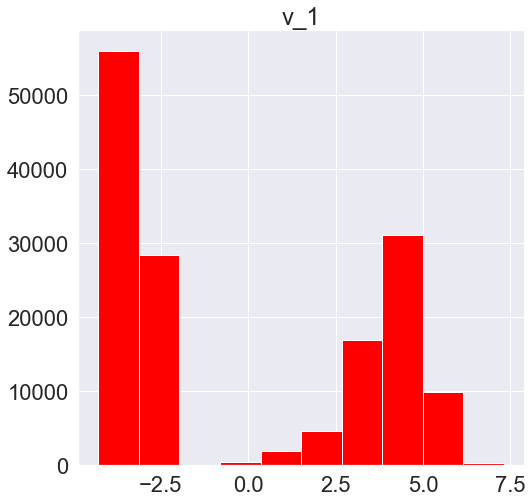

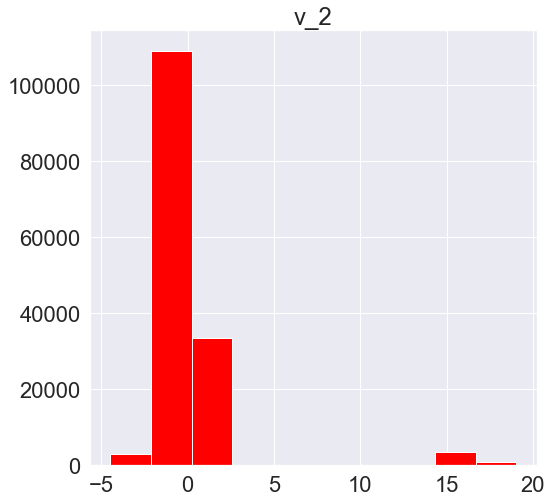

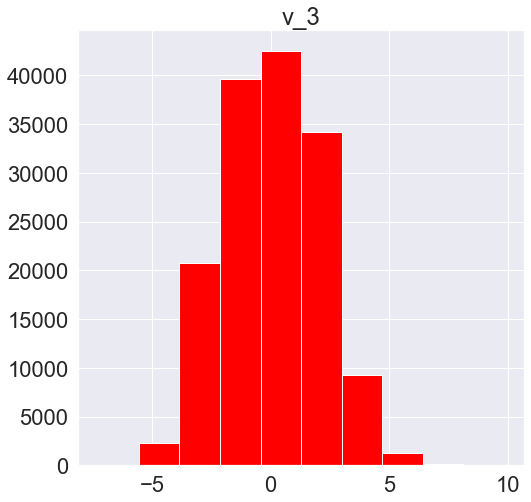

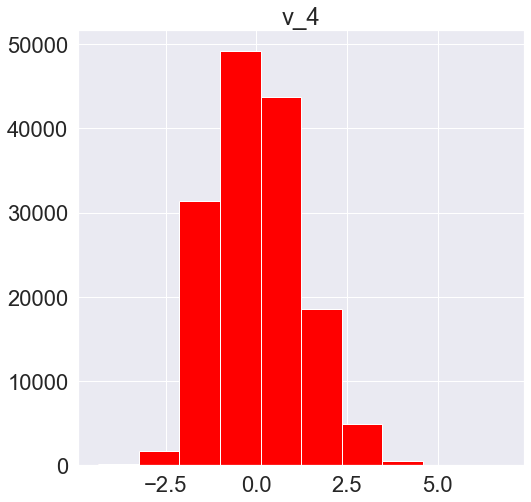

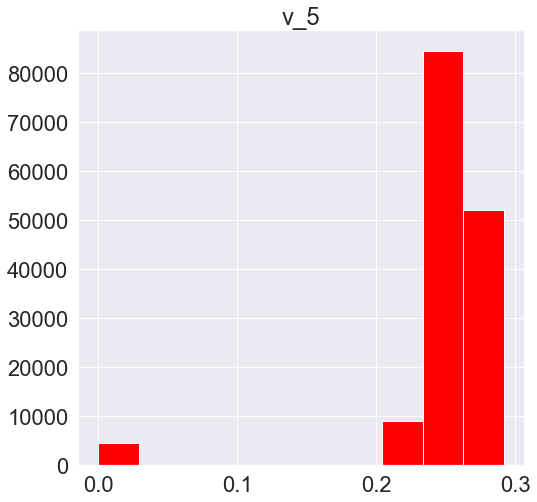

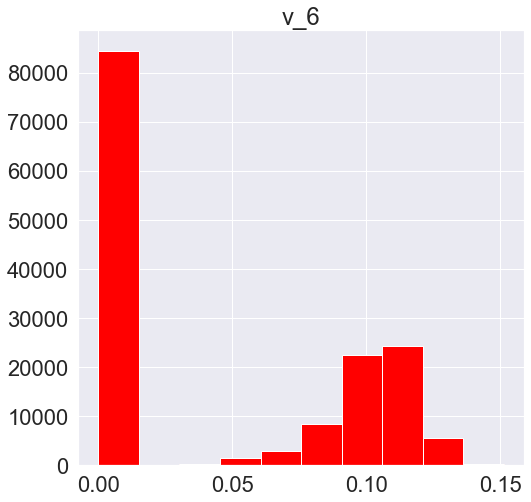

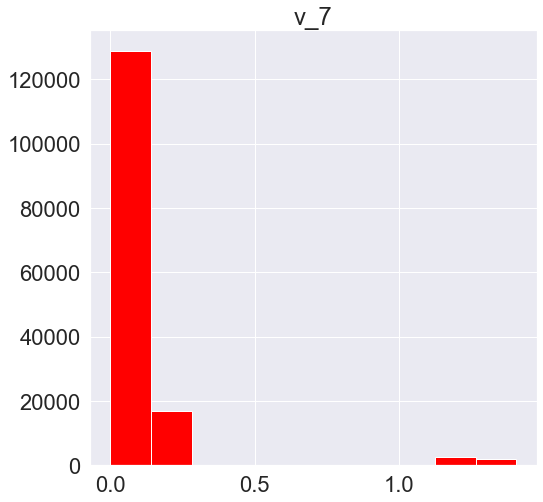

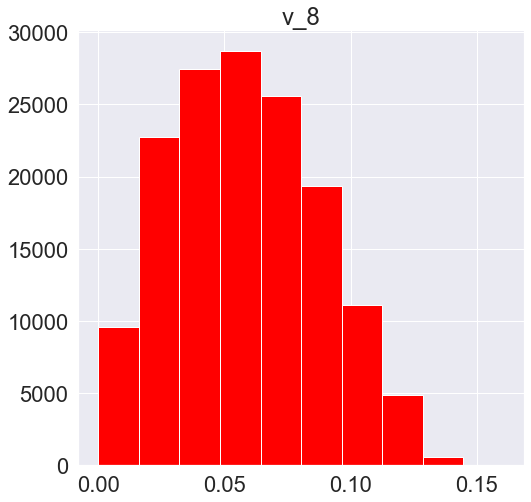

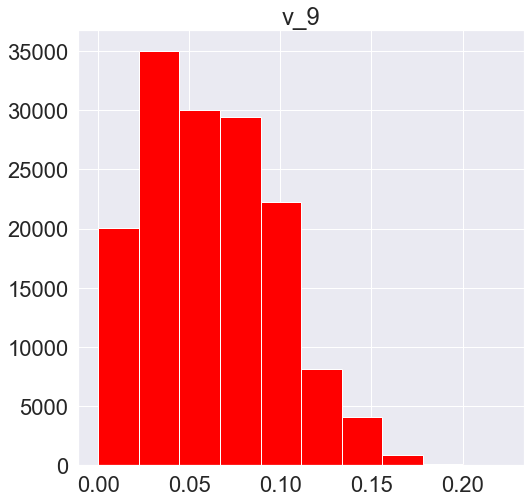

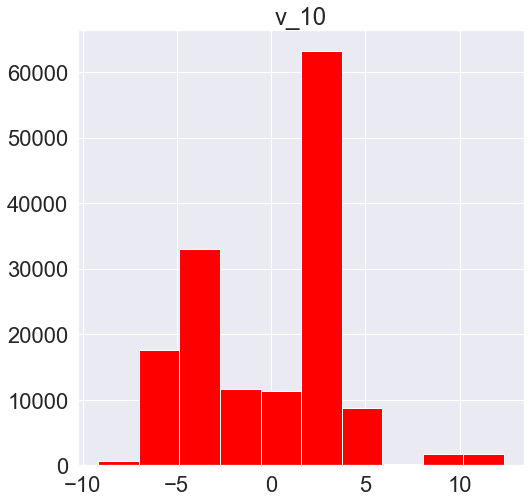

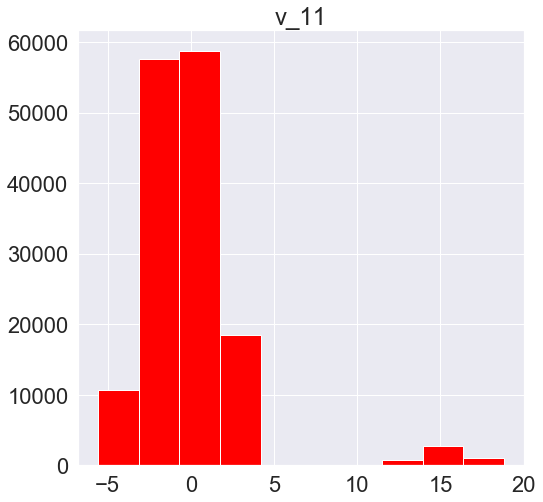

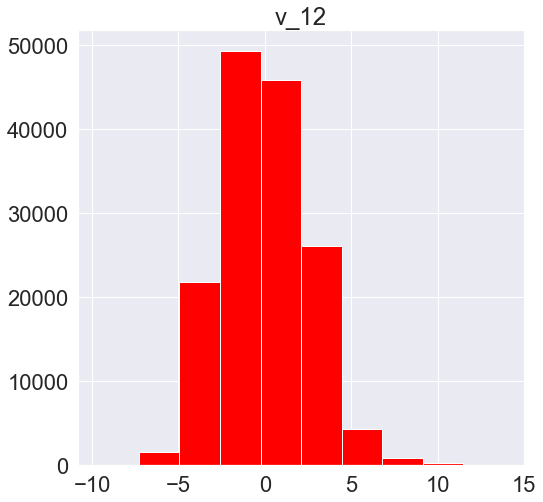

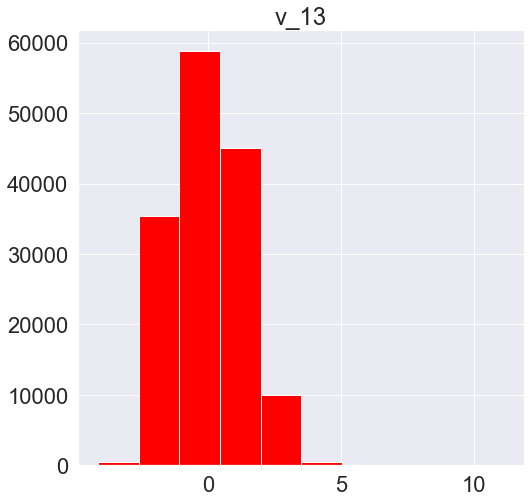

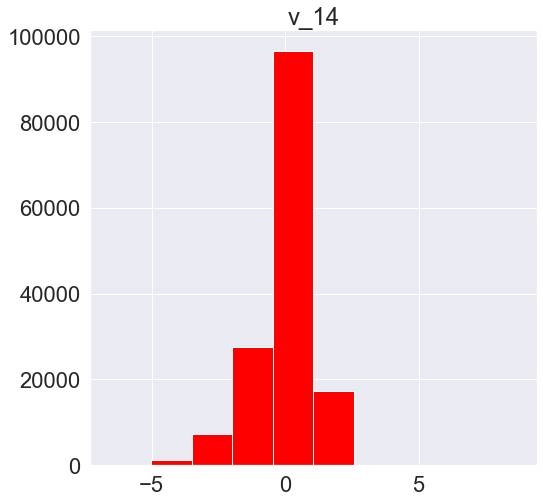

In [13]:
figsize(8, 8)

# 为每一个变量绘制直方图
for col in feature_cols:
    plt.hist(data[col], orientation= 'vertical', histtype='bar', color='red')
    plt.title(col)
    plt.show()

观察上述单变量图，可以发现特征`fuelType`、`gearbox`、`power`、`notRepairedDamage`、`seller`、`offerTpye`、`createData`、`v_1`、`v_2`、`v_5`、`v_6`、`v_7`、`v_10`、`v_11`的数据分布**可能存在异常**。

In [14]:
abnormal_features = ['fuelType', 'gearbox', 'power', 'notRepairedDamage', 'seller',
                    'offerType', 'creatDate', 'v_1', 'v_2', 'v_5', 'v_6', 'v_7', 'v_10', 'v_11']

In [15]:
# 各特征nunique统计
for col in abnormal_features:
    print(col + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(col, data[col].nunique()))
    print(data[col].value_counts())
    print('\n')

fuelType的特征分布如下：
fuelType特征有个7不同的值
0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64


gearbox的特征分布如下：
gearbox特征有个2不同的值
0.0    111623
1.0     32396
Name: gearbox, dtype: int64


power的特征分布如下：
power特征有个566不同的值
0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64


notRepairedDamage的特征分布如下：
notRepairedDamage特征有个2不同的值
0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64


seller的特征分布如下：
seller特征有个2不同的值
0    149999
1         1
Name: seller, dtype: int64


offerType的特征分布如下：
offerType特征有个1不同的值
0    150000
Name: offerType, dtype: int64


creatDate的特征分布如下：
creatDate特征有个96不同的值
20160403    5848
20160404    5606
20160320    5485
20160312    5383
20160402    5382
            ... 
20151227       1
20151217       1
20160131       1
20160130       1
20160115       1
Name: creatDate

* 发现特征`seller`和`offerType`的值存在严重倾斜（如`seller`中0有149999个，1只有1个；`offerType`中全为0）有理由认为，这两个特征值对预测结果基本上不起作用，**考虑删除**。
* 特征`creatDate`是和时间有关的特征，可以考虑将其转换为相对时间（一种考虑的方式为联合`regDate`车辆注册时间，计算出相对时间）根据常识，这样的一个时间信息对汽车的售价应该存在某种联系。
* 特征`fuelType`大多数属于类别0或类别1，其他类别的数量差别很大。单从这个特征考虑，数据存在极大的不平衡，具体处理待定。TODO: deal with `fuelType`
* 特征`bearbox`也存在一定的数据不平衡现象。TODO: deal with `bearbox`
* 特征`power`存在异常，从数据格式说明中可以知道`power`的取值范围为[0, 600]，而原数据明显不在此范围内。TODO: deal with `power`
* 特征`notRepairedDamage`不仅存在大量缺失值，还存在数据不平衡问题。TODO: deal with `notRepairedDamage`
* 特征`v_1`、`v_2`、`v_5`、`v_6`、`v_7`、`v_10`、`v_11`均存在"小部分数据离群"，有理由认为是离群点。TODO: deal with `v_1`、`v_2`、`v_5`、`v_6`、`v_7`、`v_10`、`v_11`

### 查看creatDate和regDate

考虑相对时间，但是发现特征`regDate`中存在不符合yyyymmdd格式的日期，所以在计算相对时间时要用`errors='coerce'`

In [17]:
# 复制'regDate'列，并命名为'Date_Start'
# 复制'creatDate'列，并命名为'Date_End'
# 避免直接在原始数据上计算
# 并将转换为转换为pandas中的日期类型

data['Date_End'] = pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='ignore')

# 查看转换后的结果
# data['Date_End']
# data['Data_Start']


In [18]:
# regDate存在不符合yyyymmdd格式的日期
# 利用正则表达式进行过滤
import re

rule = r'^([\d]{4}((((0[13578]|1[02])((0[1-9])|([12][0-9])|(3[01])))|(((0[469])|11)((0[1-9])|([12][0-9])|30))|(02((0[1-9])|(1[0-9])|(2[0-8])))))|((((([02468][048])|([13579][26]))00)|([0-9]{2}(([02468][048])|([13579][26]))))(((0[13578]|1[02])((0[1-9])|([12][0-9])|(3[01])))|(((0[469])|11)((0[1-9])|([12][0-9])|30))|(02((0[1-9])|(1[0-9])|(2[0-9]))))){4})$'

regex = re.compile(rule)

data['Date_copy'] = ' '

for i in range(data['regDate'].shape[0]):
    if regex.match(str(data['regDate'][i])):
        data['Date_copy'][i] = data['regDate'][i]
    else:
        data['Date_copy'][i] = np.nan

In [19]:
data['Date_copy'].isnull().sum()

11347

In [21]:
# 同时，查看test数据集中特征`regDate`是否也存在格式不正确的情况
# 读取test数据文件
test = pd.read_csv('used_car_testA_20200313.csv', sep=' ')


In [30]:
test['test1'] = ' '

for i in range(test['regDate'].shape[0]):
    if regex.match(str(test['regDate'][i])):
        test['test1'][i] = test['regDate'][i]
    else:
        test['test1'][i] = np.nan
        print('第{}行的日期格式{}不正确'.format(i, test['regDate'][i]))

第24行的日期格式20000002不正确
第30行的日期格式20030008不正确
第31行的日期格式20000011不正确
第33行的日期格式20030004不正确
第72行的日期格式19980005不正确
第90行的日期格式19980005不正确
第99行的日期格式19980011不正确
第147行的日期格式20030005不正确
第153行的日期格式20000010不正确
第165行的日期格式20040009不正确
第220行的日期格式20000011不正确
第231行的日期格式19960009不正确
第256行的日期格式19950005不正确
第280行的日期格式20030005不正确
第297行的日期格式19960010不正确
第299行的日期格式20000005不正确
第304行的日期格式19970004不正确
第314行的日期格式19930005不正确
第328行的日期格式19970009不正确
第335行的日期格式20110004不正确
第368行的日期格式20020010不正确
第383行的日期格式19950006不正确
第389行的日期格式19970007不正确
第393行的日期格式20010011不正确
第427行的日期格式19970008不正确
第457行的日期格式19990011不正确
第463行的日期格式20060003不正确
第515行的日期格式20050002不正确
第516行的日期格式19980006不正确
第517行的日期格式20000008不正确
第549行的日期格式19950011不正确
第571行的日期格式20080005不正确
第599行的日期格式19940002不正确
第606行的日期格式19950003不正确
第617行的日期格式19970008不正确
第628行的日期格式20000010不正确
第637行的日期格式20010007不正确
第640行的日期格式19970003不正确
第658行的日期格式20000010不正确
第661行的日期格式19980007不正确
第690行的日期格式19940008不正确
第692行的日期格式19990008不正确
第699行的日期格式19960006不正确
第701行的日期格式20000005不正确
第704行的日期格式19950002不正确
第711行的日期格式1993000

第4758行的日期格式19950002不正确
第4765行的日期格式19990012不正确
第4799行的日期格式19960007不正确
第4808行的日期格式19960002不正确
第4821行的日期格式19990008不正确
第4827行的日期格式20020012不正确
第4836行的日期格式20000009不正确
第4849行的日期格式20000004不正确
第4852行的日期格式20020007不正确
第4876行的日期格式19950003不正确
第4879行的日期格式20000003不正确
第4902行的日期格式19950005不正确
第4907行的日期格式19940012不正确
第4921行的日期格式19990008不正确
第5000行的日期格式20040006不正确
第5024行的日期格式20000004不正确
第5027行的日期格式19940001不正确
第5029行的日期格式20070007不正确
第5030行的日期格式19990005不正确
第5035行的日期格式19950003不正确
第5076行的日期格式20070010不正确
第5078行的日期格式20000005不正确
第5098行的日期格式19950007不正确
第5148行的日期格式19960007不正确
第5149行的日期格式20080006不正确
第5179行的日期格式20010001不正确
第5197行的日期格式20000011不正确
第5232行的日期格式19960003不正确
第5258行的日期格式20040005不正确
第5266行的日期格式19970006不正确
第5285行的日期格式19980010不正确
第5303行的日期格式19910012不正确
第5306行的日期格式19960009不正确
第5317行的日期格式19980010不正确
第5323行的日期格式19940002不正确
第5328行的日期格式20090012不正确
第5363行的日期格式20000008不正确
第5378行的日期格式20020006不正确
第5390行的日期格式20060004不正确
第5402行的日期格式20060008不正确
第5410行的日期格式19970008不正确
第5414行的日期格式19970010不正确
第5427行的日期格式19990009不正确
第5452行的日期格式

第9637行的日期格式19990002不正确
第9643行的日期格式19960006不正确
第9654行的日期格式19990004不正确
第9663行的日期格式20060001不正确
第9671行的日期格式20010004不正确
第9716行的日期格式20040002不正确
第9721行的日期格式20130006不正确
第9747行的日期格式19970010不正确
第9762行的日期格式19970007不正确
第9776行的日期格式20000006不正确
第9785行的日期格式20050009不正确
第9795行的日期格式19910008不正确
第9831行的日期格式19990001不正确
第9832行的日期格式20000011不正确
第9837行的日期格式20010005不正确
第9848行的日期格式20000004不正确
第9861行的日期格式20060012不正确
第9862行的日期格式20050012不正确
第9875行的日期格式20080005不正确
第9878行的日期格式20010008不正确
第9881行的日期格式20130010不正确
第9887行的日期格式19990002不正确
第9901行的日期格式20040009不正确
第9902行的日期格式19950005不正确
第9906行的日期格式19970006不正确
第9946行的日期格式19950008不正确
第9957行的日期格式20080003不正确
第9978行的日期格式19970002不正确
第9979行的日期格式20050010不正确
第9998行的日期格式20050009不正确
第10033行的日期格式19970009不正确
第10066行的日期格式20000011不正确
第10082行的日期格式19930004不正确
第10089行的日期格式20050007不正确
第10092行的日期格式20000003不正确
第10104行的日期格式20010006不正确
第10115行的日期格式19980006不正确
第10126行的日期格式19950005不正确
第10137行的日期格式20070008不正确
第10147行的日期格式20010005不正确
第10185行的日期格式19960004不正确
第10206行的日期格式20020001不正确
第10217行的日期格式20010006不正

第14680行的日期格式20010012不正确
第14712行的日期格式20060001不正确
第14736行的日期格式20000008不正确
第14777行的日期格式19910001不正确
第14781行的日期格式20000008不正确
第14803行的日期格式20010004不正确
第14812行的日期格式20010008不正确
第14813行的日期格式20040003不正确
第14829行的日期格式20020005不正确
第14852行的日期格式19990004不正确
第14855行的日期格式19990009不正确
第14866行的日期格式19960008不正确
第14868行的日期格式20050005不正确
第14882行的日期格式19990005不正确
第14887行的日期格式20030011不正确
第14888行的日期格式19970006不正确
第14900行的日期格式20050006不正确
第14903行的日期格式19960008不正确
第14915行的日期格式19990003不正确
第14925行的日期格式20000010不正确
第14930行的日期格式20010003不正确
第14933行的日期格式20000003不正确
第14942行的日期格式19940002不正确
第14950行的日期格式19980007不正确
第14956行的日期格式19970012不正确
第14962行的日期格式19960008不正确
第14971行的日期格式19990012不正确
第14995行的日期格式19980009不正确
第15014行的日期格式20020004不正确
第15020行的日期格式19980012不正确
第15042行的日期格式20000004不正确
第15064行的日期格式20010002不正确
第15079行的日期格式19950002不正确
第15087行的日期格式20000008不正确
第15090行的日期格式19980008不正确
第15112行的日期格式20060003不正确
第15125行的日期格式19980001不正确
第15135行的日期格式19970012不正确
第15144行的日期格式20020007不正确
第15146行的日期格式19980010不正确
第15150行的日期格式19950008不正确
第15153行的日期格式2004

第19445行的日期格式19980002不正确
第19468行的日期格式19990012不正确
第19470行的日期格式19970009不正确
第19495行的日期格式19970012不正确
第19512行的日期格式20000009不正确
第19521行的日期格式20030007不正确
第19534行的日期格式19980010不正确
第19561行的日期格式19950003不正确
第19569行的日期格式19920003不正确
第19584行的日期格式19980010不正确
第19596行的日期格式20050004不正确
第19604行的日期格式19960003不正确
第19610行的日期格式19990010不正确
第19611行的日期格式20030003不正确
第19619行的日期格式19930006不正确
第19620行的日期格式20150004不正确
第19625行的日期格式20040010不正确
第19628行的日期格式19950007不正确
第19637行的日期格式20010002不正确
第19653行的日期格式20060005不正确
第19654行的日期格式20000011不正确
第19660行的日期格式20050002不正确
第19668行的日期格式20030008不正确
第19679行的日期格式20000002不正确
第19711行的日期格式19970003不正确
第19718行的日期格式20000011不正确
第19720行的日期格式20050005不正确
第19729行的日期格式20000004不正确
第19732行的日期格式19990002不正确
第19746行的日期格式20060011不正确
第19765行的日期格式19950012不正确
第19769行的日期格式20050011不正确
第19771行的日期格式20000007不正确
第19815行的日期格式20070006不正确
第19818行的日期格式20080012不正确
第19856行的日期格式20030011不正确
第19873行的日期格式20070001不正确
第19876行的日期格式19970003不正确
第19914行的日期格式20100009不正确
第19929行的日期格式20010012不正确
第19935行的日期格式20040007不正确
第19937行的日期格式2000

第24285行的日期格式20010011不正确
第24287行的日期格式20010007不正确
第24291行的日期格式19950009不正确
第24305行的日期格式20000001不正确
第24323行的日期格式20000010不正确
第24327行的日期格式19990011不正确
第24352行的日期格式20040008不正确
第24369行的日期格式20060007不正确
第24370行的日期格式20010001不正确
第24387行的日期格式20060004不正确
第24392行的日期格式19940006不正确
第24393行的日期格式20000008不正确
第24394行的日期格式20000008不正确
第24400行的日期格式19970009不正确
第24401行的日期格式20000005不正确
第24409行的日期格式19990007不正确
第24425行的日期格式20000007不正确
第24430行的日期格式20050005不正确
第24449行的日期格式20000006不正确
第24475行的日期格式19980008不正确
第24522行的日期格式20070002不正确
第24533行的日期格式20000012不正确
第24572行的日期格式20010010不正确
第24573行的日期格式19990009不正确
第24579行的日期格式20080008不正确
第24582行的日期格式20000001不正确
第24584行的日期格式19970012不正确
第24625行的日期格式20030012不正确
第24643行的日期格式20080001不正确
第24653行的日期格式20040001不正确
第24660行的日期格式20080010不正确
第24664行的日期格式20030006不正确
第24666行的日期格式19980001不正确
第24677行的日期格式19990012不正确
第24682行的日期格式19920001不正确
第24691行的日期格式19990009不正确
第24696行的日期格式19950002不正确
第24708行的日期格式20090012不正确
第24711行的日期格式19910001不正确
第24755行的日期格式19950005不正确
第24780行的日期格式20090012不正确
第24782行的日期格式1997

第28980行的日期格式19950010不正确
第28986行的日期格式20060003不正确
第28995行的日期格式20050006不正确
第29001行的日期格式20030004不正确
第29020行的日期格式19950011不正确
第29049行的日期格式20020007不正确
第29069行的日期格式19970009不正确
第29074行的日期格式20030001不正确
第29094行的日期格式19980006不正确
第29109行的日期格式19990005不正确
第29115行的日期格式19950008不正确
第29122行的日期格式20000003不正确
第29127行的日期格式19950007不正确
第29132行的日期格式20000007不正确
第29141行的日期格式19950008不正确
第29168行的日期格式20020001不正确
第29180行的日期格式20010006不正确
第29195行的日期格式20080007不正确
第29209行的日期格式19990004不正确
第29213行的日期格式19990010不正确
第29215行的日期格式19980001不正确
第29219行的日期格式20050002不正确
第29223行的日期格式19980009不正确
第29232行的日期格式19940011不正确
第29234行的日期格式19970011不正确
第29245行的日期格式20020009不正确
第29253行的日期格式19960003不正确
第29273行的日期格式20110006不正确
第29296行的日期格式19970011不正确
第29310行的日期格式19980001不正确
第29311行的日期格式20080003不正确
第29320行的日期格式19950002不正确
第29325行的日期格式19930010不正确
第29347行的日期格式19970006不正确
第29379行的日期格式19990004不正确
第29407行的日期格式19990007不正确
第29427行的日期格式19950010不正确
第29437行的日期格式20020009不正确
第29441行的日期格式20090009不正确
第29443行的日期格式19980012不正确
第29471行的日期格式19990005不正确
第29486行的日期格式2000

第33950行的日期格式20150011不正确
第33973行的日期格式19950001不正确
第34020行的日期格式20010003不正确
第34021行的日期格式19960009不正确
第34024行的日期格式19980001不正确
第34031行的日期格式20010007不正确
第34033行的日期格式20040003不正确
第34041行的日期格式19970011不正确
第34065行的日期格式20000010不正确
第34069行的日期格式19940012不正确
第34070行的日期格式20060009不正确
第34073行的日期格式20000012不正确
第34075行的日期格式19950001不正确
第34094行的日期格式19960010不正确
第34114行的日期格式19950006不正确
第34135行的日期格式20040007不正确
第34156行的日期格式20030002不正确
第34163行的日期格式20010009不正确
第34167行的日期格式19980012不正确
第34182行的日期格式19920002不正确
第34184行的日期格式19960010不正确
第34205行的日期格式20030001不正确
第34206行的日期格式19950011不正确
第34229行的日期格式20060002不正确
第34244行的日期格式19960006不正确
第34268行的日期格式19930008不正确
第34273行的日期格式19980001不正确
第34286行的日期格式20110004不正确
第34287行的日期格式20020010不正确
第34290行的日期格式20030007不正确
第34296行的日期格式20050005不正确
第34303行的日期格式19970005不正确
第34363行的日期格式20050007不正确
第34364行的日期格式20030011不正确
第34405行的日期格式20020002不正确
第34441行的日期格式19980002不正确
第34460行的日期格式19910001不正确
第34469行的日期格式19960008不正确
第34488行的日期格式20060008不正确
第34492行的日期格式20070004不正确
第34499行的日期格式19960010不正确
第34507行的日期格式1991

第38743行的日期格式19990004不正确
第38744行的日期格式19990004不正确
第38776行的日期格式19990010不正确
第38780行的日期格式20000001不正确
第38791行的日期格式20050010不正确
第38807行的日期格式20010006不正确
第38811行的日期格式19990011不正确
第38846行的日期格式20030010不正确
第38850行的日期格式19980006不正确
第38852行的日期格式19950011不正确
第38863行的日期格式19960012不正确
第38893行的日期格式19950001不正确
第38894行的日期格式20000008不正确
第38895行的日期格式20010003不正确
第38901行的日期格式20000011不正确
第38903行的日期格式19980001不正确
第38913行的日期格式20000010不正确
第38953行的日期格式20000007不正确
第38964行的日期格式20050010不正确
第38967行的日期格式20010002不正确
第38986行的日期格式19980005不正确
第38988行的日期格式20000008不正确
第38990行的日期格式20020009不正确
第39052行的日期格式20020007不正确
第39072行的日期格式20040010不正确
第39086行的日期格式19960009不正确
第39088行的日期格式20040009不正确
第39100行的日期格式20010012不正确
第39133行的日期格式19990004不正确
第39144行的日期格式20000012不正确
第39150行的日期格式19970010不正确
第39165行的日期格式20020009不正确
第39169行的日期格式19960007不正确
第39177行的日期格式20080006不正确
第39184行的日期格式19980003不正确
第39190行的日期格式20040009不正确
第39196行的日期格式20000006不正确
第39200行的日期格式20060003不正确
第39226行的日期格式19990007不正确
第39241行的日期格式19980004不正确
第39249行的日期格式19970006不正确
第39256行的日期格式1991

第43556行的日期格式20010006不正确
第43572行的日期格式19980002不正确
第43623行的日期格式19970004不正确
第43627行的日期格式20030007不正确
第43630行的日期格式20000011不正确
第43732行的日期格式19990009不正确
第43735行的日期格式19950004不正确
第43748行的日期格式19980005不正确
第43770行的日期格式20070002不正确
第43774行的日期格式20040002不正确
第43780行的日期格式20030007不正确
第43807行的日期格式20020004不正确
第43822行的日期格式20030007不正确
第43832行的日期格式20020004不正确
第43856行的日期格式20090011不正确
第43859行的日期格式20000008不正确
第43869行的日期格式20070008不正确
第43885行的日期格式20040008不正确
第43887行的日期格式20000002不正确
第43899行的日期格式20060010不正确
第43912行的日期格式20100011不正确
第43916行的日期格式19940010不正确
第43973行的日期格式19950009不正确
第43975行的日期格式19970004不正确
第43997行的日期格式20060002不正确
第44006行的日期格式20030009不正确
第44007行的日期格式19960012不正确
第44022行的日期格式20050008不正确
第44023行的日期格式20050002不正确
第44025行的日期格式19980012不正确
第44044行的日期格式19980011不正确
第44048行的日期格式19930007不正确
第44069行的日期格式20020010不正确
第44105行的日期格式20050006不正确
第44116行的日期格式19990001不正确
第44149行的日期格式20000005不正确
第44151行的日期格式20020004不正确
第44157行的日期格式20000010不正确
第44163行的日期格式19920006不正确
第44173行的日期格式20050008不正确
第44177行的日期格式20000009不正确
第44202行的日期格式2008

第48590行的日期格式19960003不正确
第48606行的日期格式19990012不正确
第48610行的日期格式20000008不正确
第48622行的日期格式20000008不正确
第48625行的日期格式19960007不正确
第48648行的日期格式20040001不正确
第48652行的日期格式19980010不正确
第48674行的日期格式20010005不正确
第48683行的日期格式20020010不正确
第48721行的日期格式19980010不正确
第48754行的日期格式20150006不正确
第48783行的日期格式19960011不正确
第48816行的日期格式20000004不正确
第48836行的日期格式20110002不正确
第48863行的日期格式19950004不正确
第48866行的日期格式19980004不正确
第48867行的日期格式20010001不正确
第48900行的日期格式19920005不正确
第48919行的日期格式20010001不正确
第48923行的日期格式20000004不正确
第48931行的日期格式20000006不正确
第48970行的日期格式19990002不正确
第48985行的日期格式19960003不正确
第49001行的日期格式20000003不正确
第49008行的日期格式20010010不正确
第49022行的日期格式20000011不正确
第49024行的日期格式20040011不正确
第49025行的日期格式19990002不正确
第49033行的日期格式20040008不正确
第49034行的日期格式20080009不正确
第49071行的日期格式20080001不正确
第49079行的日期格式20050006不正确
第49080行的日期格式20060008不正确
第49095行的日期格式19920006不正确
第49115行的日期格式19910001不正确
第49131行的日期格式20000003不正确
第49133行的日期格式19980001不正确
第49135行的日期格式19990007不正确
第49150行的日期格式20050004不正确
第49159行的日期格式20000004不正确
第49170行的日期格式19950009不正确
第49188行的日期格式1995

In [31]:
test['test1'].isnull().sum()

3754

* 训练数据中特征`regDate`存在11347条不符合yyyymmdd格式的日期（缺失具体的月份）
* 测试集中特征`regDate`也存在3754条不符合yyyymmdd格式的日期（缺失具体月份）
* **所以如果想要使用相对时间这一信息，需要对不符合的日期进行修正**，对于特征`regDate`很难有合理的估计方法
* 这里，暂时将格式不符的样本设置为nan，因为目前有许多树模型可以自行处理nan
* 所以在计算相对时间时，设置errors='coerce'

In [14]:
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

## 特征间相关性分析

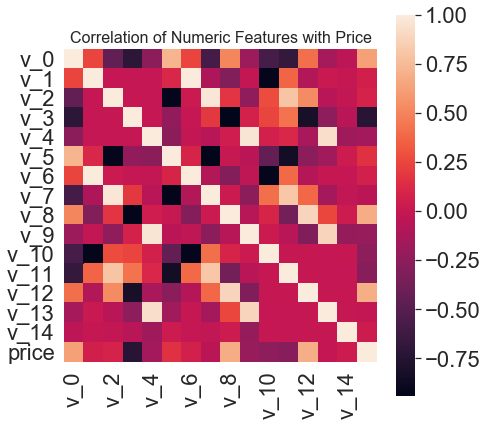

In [14]:
# 当然也可以直接看图
data_numeric = data[['v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
                    'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'price']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=1)

In [15]:
correlation

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
v_0,1.000000,0.245049,-0.452591,-0.710480,-0.259714,0.726250,0.243783,-0.584363,0.514149,-0.186243,-0.582943,-0.667809,0.415711,-0.136938,-0.039809,0.628397
v_1,0.245049,1.000000,-0.001133,-0.001915,-0.000468,0.109303,0.999415,-0.110806,-0.298966,-0.007698,-0.921904,0.370445,-0.087593,0.017349,0.002143,0.060914
v_2,-0.452591,-0.001133,1.000000,0.001224,-0.001021,-0.921857,0.023877,0.973689,0.180285,-0.236164,0.274341,0.800915,0.535270,-0.055376,-0.013785,0.085322
v_3,-0.710480,-0.001915,0.001224,1.000000,-0.001694,-0.233412,-0.000747,0.191278,-0.933161,0.079292,0.247385,0.429777,-0.811301,-0.246052,-0.058561,-0.730946
v_4,-0.259714,-0.000468,-0.001021,-0.001694,1.000000,-0.259739,-0.011275,-0.054241,0.051741,0.962928,0.071116,0.110660,-0.134611,0.934580,-0.178518,-0.147085
v_5,0.726250,0.109303,-0.921857,-0.233412,-0.259739,1.000000,0.091229,-0.939385,0.010686,-0.050343,-0.440588,-0.845954,-0.258521,-0.162689,0.037804,0.164317
v_6,0.243783,0.999415,0.023877,-0.000747,-0.011275,0.091229,1.000000,-0.085410,-0.294956,-0.023057,-0.917056,0.386446,-0.070238,0.000758,-0.003322,0.068970
v_7,-0.584363,-0.110806,0.973689,0.191278,-0.054241,-0.939385,-0.085410,1.000000,0.028695,-0.264091,0.410014,0.813175,0.385378,-0.154535,-0.020218,-0.053024
v_8,0.514149,-0.298966,0.180285,-0.933161,0.051741,0.010686,-0.294956,0.028695,1.000000,-0.063577,0.094497,-0.369353,0.882121,0.250423,0.030416,0.685798
v_9,-0.186243,-0.007698,-0.236164,0.079292,0.962928,-0.050343,-0.023057,-0.264091,-0.063577,1.000000,0.026562,-0.056200,-0.313634,0.880545,-0.214151,-0.206205


## 类别型特征分析

在这一节中，将考虑类别型特征，但不考虑特征`name`、`model`、`regionCode`。

* 通过前面的数据探查，我们发现缺失值存在于特征`notRepairedDamage`、`fuelType`、`gearbox`、`bodyType`、`used_time`
* 我们认为数据发生缺失正好可以描述该车辆存在信息不全的情况，从而影响售价（试想一下，'三无产品'总不太能卖出高价）
* 对于特征`used_time`若进行one-hot编码特征维度将大大提高，我们考虑将特征`used_time`缺失的样本单独处理
* 因此，我们将不对缺失值进行填充，而是作为一种特征，使用one-hot编码方式进行处理

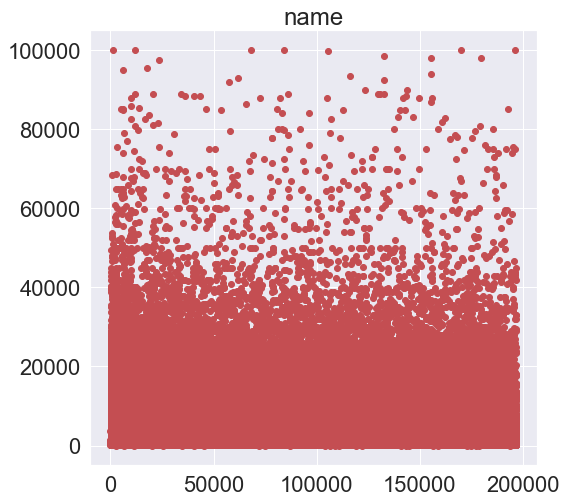

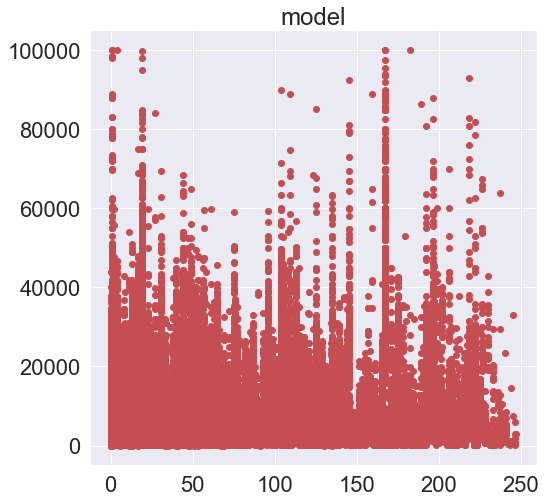

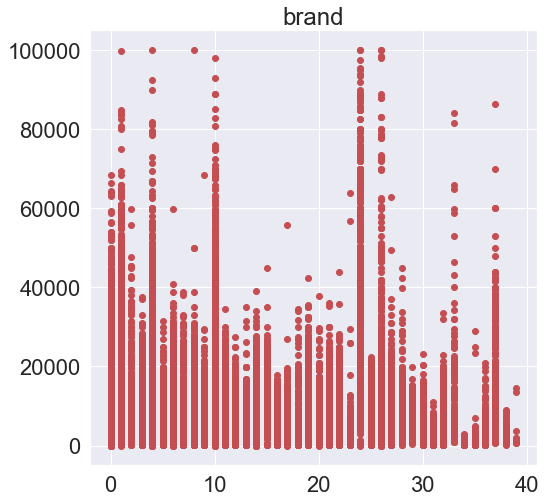

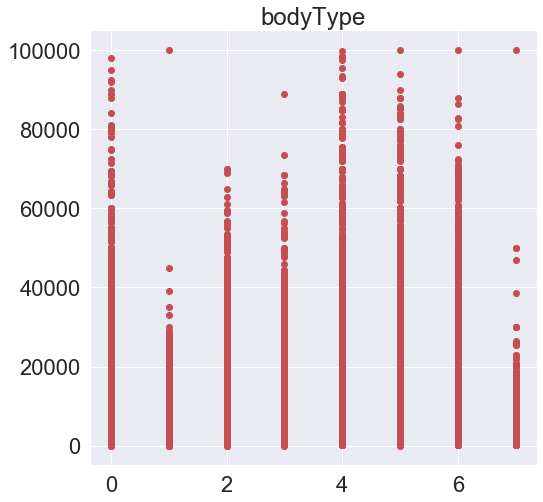

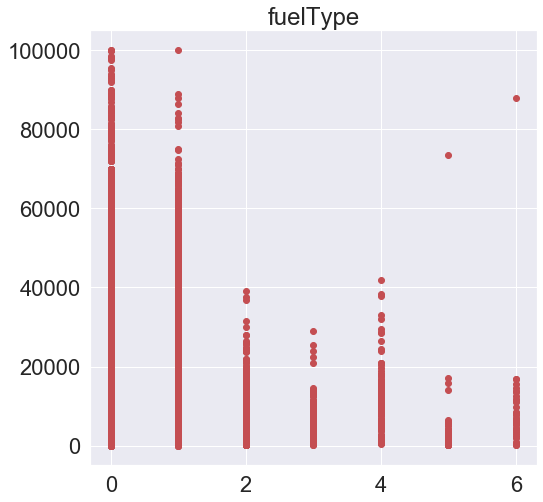

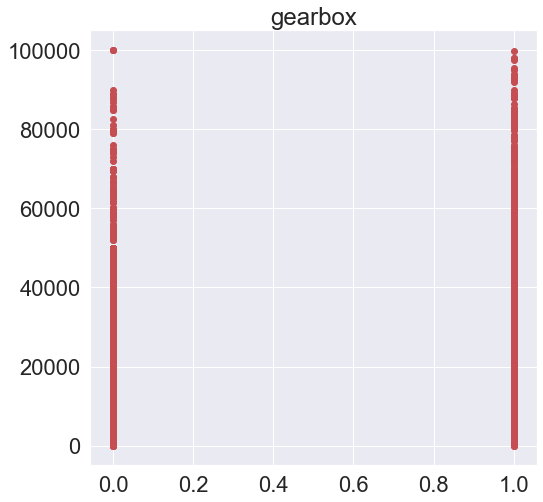

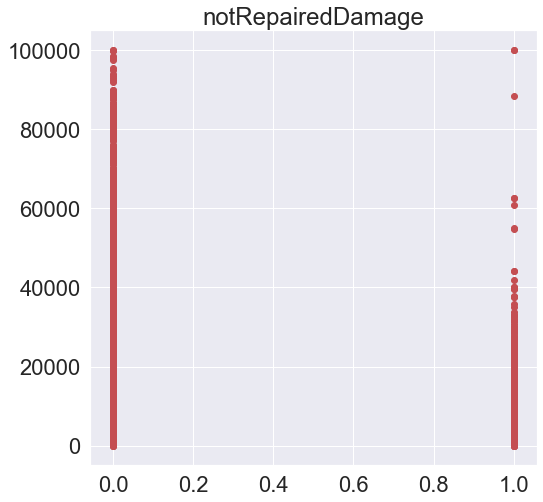

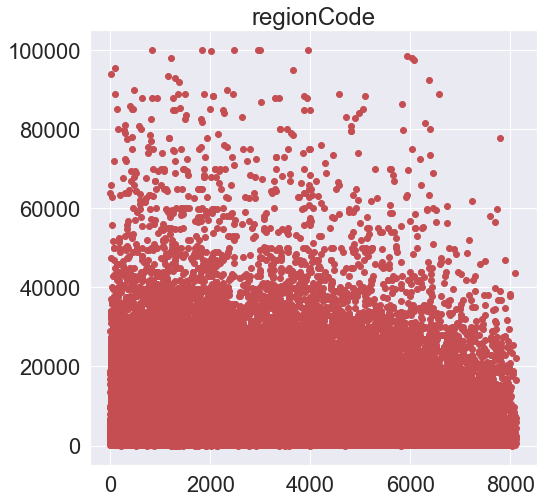

In [60]:
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

for col in categorical_features:
    plt.scatter(data[col], data['price'], c=['r'])
    plt.title(col)
    plt.show()

In [75]:
data['loss_info'] = data.isnull().sum(axis=1)

In [74]:
data.sort_values('price', ascending=False).tail(20)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time
142768,142768,108683,20050011,6.0,6,NaN,NaN,NaN,0,0.5,NaN,2777,20160307,15,32.274322,-3.833896,14.485762,8.042134,1.789435,0.000000,0.000000,1.193391,0.0,0.070744,12.043524,16.880029,-0.920850,-0.373908,-1.264339,NaN
45599,45599,144992,20020007,130.0,20,2.0,0.0,1.0,120,9.0,NaN,1700,20160326,15,37.969320,-3.118148,-3.459011,7.085420,3.132758,0.222188,0.000000,0.000000,0.0,0.177199,5.427562,1.428470,-9.223993,2.064263,-0.031276,NaN
23621,23621,158790,19960711,51.0,14,0.0,0.0,0.0,136,15.0,1.0,2013,20160317,15,38.271625,-3.182553,-3.682251,7.775096,2.546238,0.228350,0.000000,0.000000,0.0,0.164204,5.401014,1.250813,-9.639552,1.212014,-0.260512,7189.0
136459,136459,106249,20050012,1.0,4,NaN,NaN,NaN,0,0.5,NaN,3568,20160321,15,33.213021,-3.990976,14.908158,8.863299,1.009227,0.000000,0.000000,1.256017,0.0,0.053368,12.010943,16.838564,-0.748998,-1.621941,-0.838295,NaN
1663,1663,104033,20150002,0.0,0,NaN,NaN,NaN,0,0.5,NaN,3377,20160307,15,32.975187,-3.865395,14.918919,7.336315,2.313534,0.000000,0.000000,1.205369,0.0,0.079990,11.823158,16.670048,0.048213,0.215563,-0.483447,NaN
95632,95632,172834,20070008,91.0,0,NaN,NaN,NaN,0,8.0,NaN,1912,20160330,15,32.590269,-3.859853,14.609711,8.174928,3.474444,0.000000,0.000000,1.155240,0.0,0.112157,12.029803,16.906471,-0.910445,1.004063,-0.731483,NaN
129878,129878,122198,20100002,11.0,10,NaN,NaN,NaN,0,0.5,NaN,726,20160311,15,33.465972,-3.976010,15.063050,8.293492,2.107002,0.000000,0.000000,1.231507,0.0,0.078420,11.884577,16.722337,-0.250492,-0.520462,-0.827881,NaN
15833,15833,140993,20010001,67.0,0,1.0,1.0,NaN,61,15.0,NaN,5821,20160312,15,38.978040,-3.345675,-2.184581,8.175012,2.794498,0.212750,0.000000,0.104926,0.0,0.170780,5.649411,2.007922,-8.679290,0.901344,-0.275559,NaN
89792,89792,118882,20090006,41.0,6,NaN,NaN,NaN,0,6.0,0.0,3498,20160312,14,31.559888,-3.725336,14.184443,7.597646,3.472383,0.000000,0.000000,1.115300,0.0,0.110018,12.146427,17.042709,-1.268501,1.670326,-0.023358,NaN
37870,37870,156296,20130811,53.0,4,0.0,1.0,1.0,0,0.5,0.0,1202,20160327,13,41.672293,-3.555951,-1.962063,7.863730,1.692640,0.234093,0.000000,0.135699,0.0,0.138871,4.788744,0.584751,-7.100589,-0.797032,-0.849644,959.0


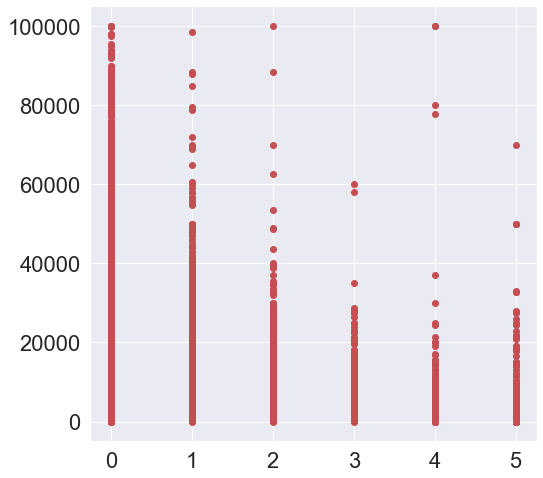

In [76]:
plt.scatter(data['loss_info'], data['price'], c=['r'])
plt.show()

In [15]:
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,NaN,4366,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7125.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,5772.0
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,2322.0
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,2003.0
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,3673.0
